In [25]:
import numpy as np
import pandas as pd
orien_case = pd.read_csv("./JiecongData/orientation_dimer.csv", index_col=[0])
overlap_len = pd.read_csv("./JiecongData/overlaplen_dimer.csv", index_col=[0])
dimer_data = pd.read_csv("./JiecongData/row_dimer_data.csv", index_col=[0])
# overlap_len
len1=max(overlap_len['NumOfCols1'])
len2=max(overlap_len['NumOfCols2'])
print(len1, len2)
# dimer_data[dimer_data['name1'] == 'HOXB2']
case_types = dimer_data['case']
print(len(case_types[case_types <=2]))
print(len(case_types))

18 18
322
614


In [29]:
dimer_over_dict = {}
for idx, row in overlap_len.iterrows():
    dname = row['DimerName']
    dimer_over_dict[dname] = dimer_over_dict.get(dname, 0) + 1
dnum = np.array(list(dimer_over_dict.values()))
print(len(dnum))
# print(dimer_over_dict)
print("The num of dimer that generated by same motif pair")
print(np.mean(dnum), np.min(dnum), np.max(dnum), np.median(dnum))

313
1.961661341853035 1 10 2.0


In [4]:
dimer_len_case = []
len_over = []
for idx, row in overlap_len.iterrows():
    dname = row['DimerName']
    olen = str(row['OverlapLength'])
    ocase = str(row['CaseNumber'])
    len_over.append(int(olen))
    dimer_len_case.append(dname + ": " + olen + " " + ocase)
# print(dimer_len_case)
len_over = np.array(len_over)
print(len(dimer_len_case))
print(len(set(dimer_len_case)))
print("Overlapping length between motif pairs: ")
print(np.min(len_over), np.max(len_over), np.mean(len_over), np.median(len_over))

614
549
Overlapping length between motif pairs
-16 15 1.5456026058631922 2.0


In [9]:
import pickle as pkl
mdata = pkl.load(open("./dimer_motif_pair.pkl", "rb"))
max_len = 0
for motif in mdata:
    dimer_dict = motif[0]
    motif1_dict = motif[1]
    motif2_dict = motif[2]
    dimer_family = motif[3]
    
    dimer_name = list(dimer_dict.keys())[0]
    motif1_name = list(motif1_dict.keys())[0]
    motif2_name = list(motif2_dict.keys())[0] 
    
    dimer_seq = dimer_dict[dimer_name]
    motif1_seq = motif1_dict[motif1_name]
    motif2_seq = motif2_dict[motif2_name]
    
    len1 = len(motif1_seq)
    len2 = len(motif2_seq)
    len_ = max([len1, len2])
    if len_ > max_len:
        max_len = len_
print(max_len)

18


In [20]:
def get_rev_com_y(seq_mat):

    print(seq_mat)
    print("-"*50)
    reversed_mat = seq_mat[::-1].copy()

    for i in range(len(reversed_mat)):
        reversed_mat[i] = np.concatenate((reversed_mat[i][:4][::-1], reversed_mat[i][4:]))

    # print(seq_mat)
    # print(reversed_mat)
    return reversed_mat
    
motif_data = pkl.load(open("./dimer_motif_pair.pkl", "rb"))
dimer_data = pd.read_csv("./JiecongData/row_dimer_data.csv", index_col=[0])

for info in motif_data:
    for motif in motif_data:
    dimer_dict = motif[0]
    motif1_dict = motif[1]
    motif2_dict = motif[2]
    dimer_family = motif[3]
    # print(dimer_dict)
    dimer_name = list(dimer_dict.keys())[0]
    motif1_name = list(motif1_dict.keys())[0]
    motif2_name = list(motif2_dict.keys())[0]
    motif_pair_name = motif1_name + ":" + motif2_name

    dimer_seq = dimer_dict[dimer_name]
    motif1_seq = motif1_dict[motif1_name]
    motif2_seq = motif2_dict[motif2_name]

    # print(dimer_seq)
    if motif1_seq == " " or motif2_seq == " ":
        continue
        
    dimer_info = dimer_data[dimer_data['nameOut'] == dimer_name]
    if dimer_info['isRC'].item() == 1:
        dimer_seq = get_rev_com_y(dimer_seq)
            
    case_type = dimer_info['case'].item()
    motif1_loc = dimer_info['loc1'].item()    
    motif2_loc = dimer_info['loc2'].item()
    motif1_len = len(motif1_seq)
    motif2_len = len(motif2_seq)
    overlap_len = dimer_info['overlapLen'].item()
    
    if case_type == 1:
        if overlap_len < 0:
            add_len = abs(overlap_len)
            add_vec = np.zeros((add_len, 4))
            
        
    motif2_seq = get_rev_com_y(motif2_seq)    
        
            
            

(1, name1               ALX4
name2              EOMES
nameOut       ALX4_EOMES
case                   4
isRC                   0
loc1                   4
loc2                  11
quality1        0.358061
quality2        0.236269
quality          0.59433
overlapLen             6
Name: 1, dtype: object)
(2, name1               ALX4
name2              TBX21
nameOut       ALX4_TBX21
case                   2
isRC                   0
loc1                   5
loc2                  -1
quality1        0.417325
quality2        0.261092
quality         0.678417
overlapLen             4
Name: 2, dtype: object)
(3, name1                 ALX4
name2                TBX21
nameOut       ALX4_TBX21_2
case                     2
isRC                     0
loc1                     5
loc2                    -1
quality1          0.251022
quality2          0.238922
quality           0.489943
overlapLen               4
Name: 3, dtype: object)
(4, name1                 ARNTL
name2               BHLHA15
nameOut  

Name: 506, dtype: object)
(507, name1                TEAD4
name2                 DLX2
nameOut       TEAD4_DLX2_3
case                     4
isRC                     0
loc1                    -1
loc2                    10
quality1          0.236742
quality2          0.105151
quality           0.341893
overlapLen              -1
Name: 507, dtype: object)
(508, name1                TEAD4
name2                 DLX2
nameOut       TEAD4_DLX2_4
case                     2
isRC                     1
loc1                     5
loc2                    -1
quality1          0.307816
quality2          0.165505
quality           0.473321
overlapLen               2
Name: 508, dtype: object)
(509, name1                TEAD4
name2                 DLX2
nameOut       TEAD4_DLX2_5
case                     4
isRC                     0
loc1                     0
loc2                    11
quality1          0.136384
quality2          0.130967
quality           0.267351
overlapLen              -1
Name: 509, dt

In [22]:
import torch
torch.cuda.is_available()

True

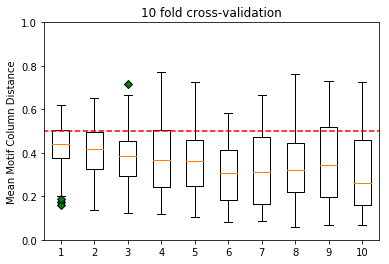

In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pylab as plt
d = pkl.load(open("./10_fold_cv300n.pkl", "rb"))
data = []
for k in d.keys():
    data.append(d[k])
    # print(np.mean(d[k]))
fig1, ax1 = plt.subplots()
ax1.set_title('10 fold cross-validation')
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(data,flierprops=green_diamond)
plt.ylabel('Mean Motif Column Distance')
plt.ylim([0.0, 1.0])
x = np.linspace(0, 11, 50)
y = 0.5 + x-x
plt.plot(x, y, color='red', linestyle='--')
plt.show()
# plt.savefig("./10_fold_cv300n.pdf")

In [45]:
kc_data = open("./JiecongData/kc_heterodimer_family.txt", "r")
kc_data = kc_data.readlines()

    